### EDA of AP MLA Data - 2019 
    1. Data Ingestion
    2. Data Duplication Check
    3. Data Null checks
    4. Data Statistics
    5. Data Visualization

#### Data Ingestion

In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path=r"D:\Career-Related\Trainings\ETLHive-Training-Content\Python\Python-ETL-Workspace\ap_mlas_data\ap_mlas_data_2019.csv"
ap_mlas_df = pd.read_csv(path, na_values=["", "NA"], keep_default_na=False)
ap_mlas_df.head()
ap_mlas_df["Elected_Year"] = "2019"
ap_mlas_df.head()

,AC_No,Constituency_Name,MLA_Name,Party,District,Elected_Year
0,1,Ichchapuram,Ashok Bendalam,TDP,Srikakulam,2019
1,2,Palasa,Appalaraju Seediri,YSRCP,Srikakulam,2019
2,3,Tekkali,Atchannaidu Kinjarapu,TDP,Srikakulam,2019
3,4,Pathapatnam,Reddy Shanthi,YSRCP,Srikakulam,2019
4,5,Srikakulam,Dharmana Prasada Rao,YSRCP,Srikakulam,2019


#### Data Duplication Check

In [284]:
ap_mlas_df.duplicated().sum().sum()

np.int64(0)

#### Data Null checks

In [285]:
ap_mlas_df.isna().sum().sum()

np.int64(0)

In [286]:
ap_mlas_df.dtypes

AC_No                 int64
Constituency_Name    object
MLA_Name             object
Party                object
District             object
Elected_Year         object
dtype: object

In [287]:
ap_mlas_df["Elected_Year"] = 2019
ap_mlas_df.dtypes

AC_No                 int64
Constituency_Name    object
MLA_Name             object
Party                object
District             object
Elected_Year          int64
dtype: object

#### Data Statistics

In [288]:
categorical = ap_mlas_df.columns[ap_mlas_df.dtypes == 'object']
categorical
continuous = ap_mlas_df.columns[ap_mlas_df.dtypes != 'object']

ap_mlas_cat = categorical; ap_mlas_con = continuous

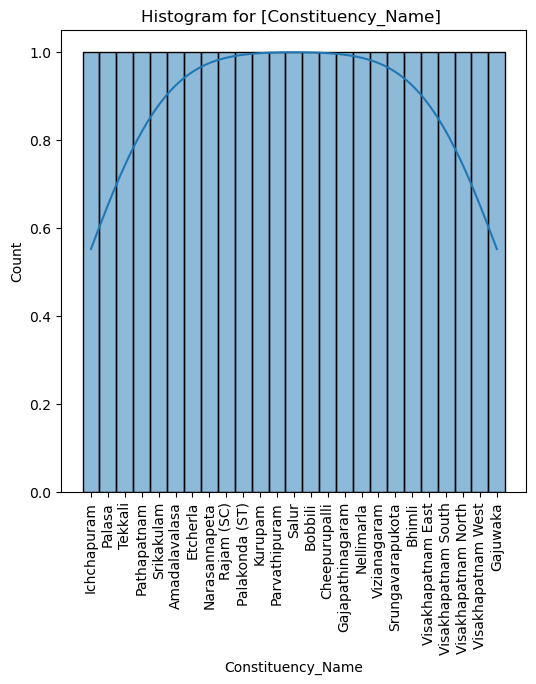

In [289]:
# Univariate Functions
def plot_count(df: pd.DataFrame, col: str):
    plt.figure(figsize=(6,6))
    sns.countplot(data=df, x=col, width=0.01)
    plt.title(f'Countplot for [{col}]  ')
    plt.xticks(rotation=90)
    plt.show()

def plot_histogram(df: pd.DataFrame, col: str):
    plt.figure(figsize=(6,6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram for [{col}] ')
    plt.xticks(rotation=90)
    plt.show()

for col in ap_mlas_cat:
    plot_histogram(ap_mlas_df.head(25), col)
    break # Just breaking for one column



In [290]:
# Bivariate functions
def plot_scatter(df: pd.DataFrame, x: str, y: str):
    plt.figure(figsize=(5,3))
    sns.regplot(data=df,x=x,y=y)
    plt.title(f"Scatterplot for {x} and {y} ")
    plt.show()

def plot_reg(df: pd.DataFrame, x: str, y: str):
    plt.figure(figsize=(5,3))
    sns.regplot(data=df, x=x, y=y, line_kws={"color":"Red"})
    plt.title(f"Regplot for {x} and {y} ")
    plt.show()
categorical, continuous

(Index(['Constituency_Name', 'MLA_Name', 'Party', 'District'], dtype='object'),
 Index(['AC_No', 'Elected_Year'], dtype='object'))

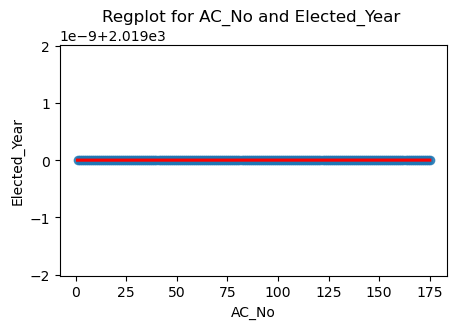

In [291]:
plot_reg(ap_mlas_df, 'AC_No', 'Elected_Year')

#### categorical vs continuous -> boxplot

In [292]:
def plot_box(df: pd.DataFrame, x: str, y: str):
    plt.figure(figsize=(5,3))
    sns.boxplot(data=df, x=x, y=y)
    plt.title(f"Boxplot for {x} and {y} ")
    plt.xticks(rotation=90)
    plt.show()

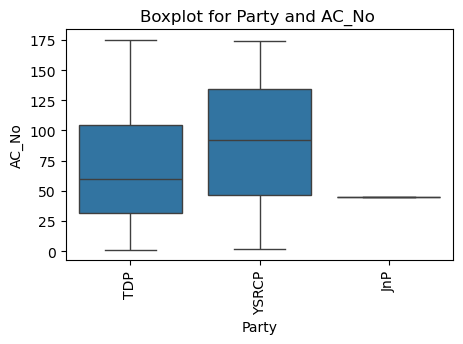

In [293]:
plot_box(ap_mlas_df, 'Party', 'AC_No')

#### Query Examples

In [294]:
# Get Party names from Data
party_names = (
    ap_mlas_df['Party'].unique()
)
party_names

array(['TDP', 'YSRCP', 'JnP'], dtype=object)

In [295]:
# Get MLA count by Party
mla_count_by_party = (
    ap_mlas_df.groupby("Party").agg({"MLA_Name":"count"}).reset_index()
)
mla_count_by_party

,Party,MLA_Name
0,JnP,1
1,TDP,23
2,YSRCP,151


In [296]:
# Get MLA count by party per District
mla_count_per_district_per_party = (
    ap_mlas_df.groupby(by = ["District", "Party"]).agg({"MLA_Name":"count"}).reset_index()
)


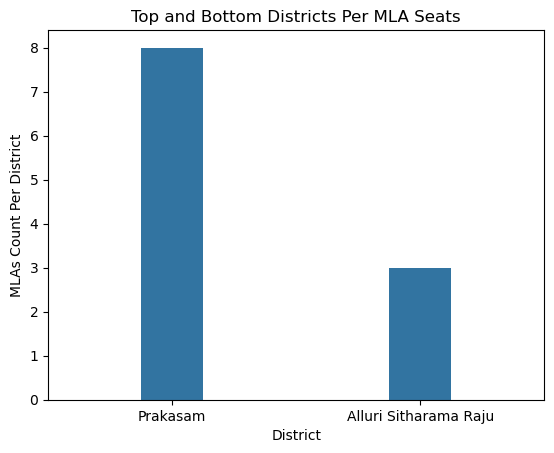

In [297]:
#Get Top and Bottom Districts with MLA Seats count
mla_seats_count_by_dist = (
    ap_mlas_df.groupby("District").agg(MLA_Count= ("MLA_Name", "count")).reset_index().sort_values(by = ["MLA_Count"])
)

top_bottom_districts_with_mla_seats_count = pd.concat([
    mla_seats_count_by_dist.tail(1).assign(Rank='Top'), mla_seats_count_by_dist.head(1)
])

top_bottom_districts_with_mla_seats_count
sns.barplot(data=top_bottom_districts_with_mla_seats_count, x='District', y='MLA_Count', width=0.25)
plt.title('Top and Bottom Districts Per MLA Seats')
plt.ylabel("MLAs Count Per District")
plt.show()

In [298]:
#Get Districtwise results of Party
party_seats_by_dist = (
    ap_mlas_df.groupby(["Party", "District"]).agg({"MLA_Name": "count"}).reset_index()
)
party_seats_by_dist.head(1)

,Party,District,MLA_Name
0,JnP,Konaseema,1


In [299]:
# Get Total Seats of AP Assembly
mla_seats_count = ap_mlas_df['Constituency_Name'].count()
mla_seats_count

np.int64(175)

In [300]:
# Get MLA Seat Percentage by Party
mla_seat_percent_by_party = (
    ap_mlas_df.groupby("Party").agg({"MLA_Name": "count"}).reset_index() 
)
mla_seat_percent_by_party['Percent'] = (
    mla_seat_percent_by_party['MLA_Name'] / mla_seats_count) * 100
mla_seat_percent_by_party

,Party,MLA_Name,Percent
0,JnP,1,0.571429
1,TDP,23,13.142857
2,YSRCP,151,86.285714


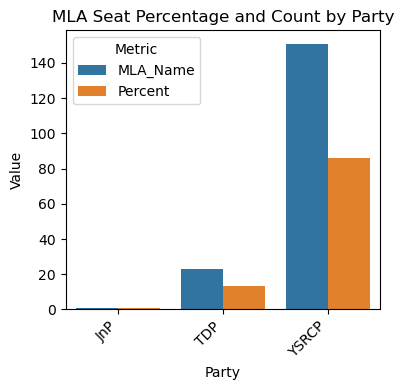

In [301]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

''' 
    melt() is a Pandas function that transforms a DataFrame from wide format to long format.
    It “unpivots” your data., Converts columns into rows., Useful for plotting and data analysis where a long format is preferred.
'''
df_long = mla_seat_percent_by_party.melt(id_vars='Party', value_vars=['MLA_Name', 'Percent', ], 
                                         var_name='Metric', value_name='Value')

plt.figure(figsize=(4,4))
sns.barplot(data=df_long, x='Party', y='Value', hue='Metric')
plt.xticks(rotation=45, ha='right')
plt.title('MLA Seat Percentage and Count by Party')
plt.tight_layout()
plt.show()

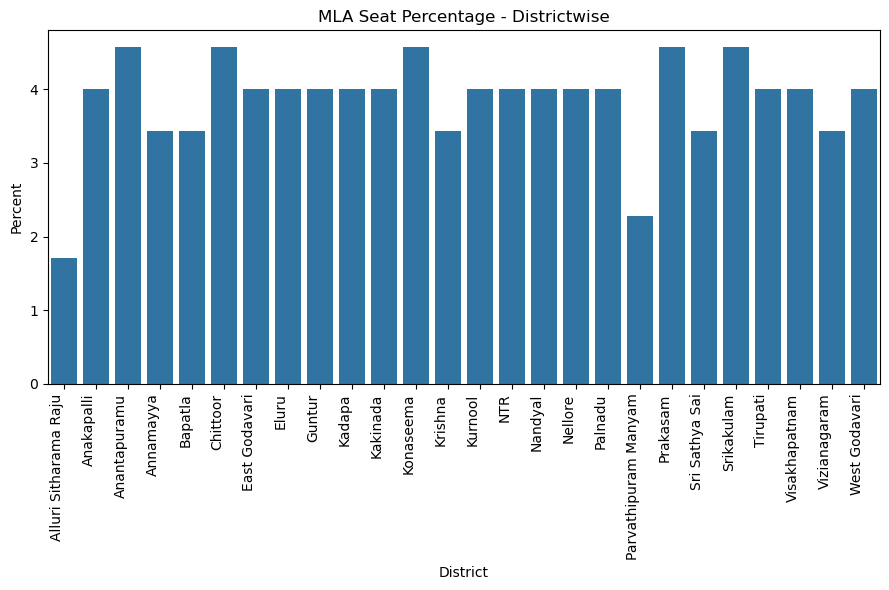

In [302]:
# Get Districtwise percentage of seats
mla_count_per_district = (
    ap_mlas_df.groupby(by = ["District"]).agg(MLA_Count= ("MLA_Name", "count")).reset_index()
)
mla_count_per_district['Percent'] = (
    mla_count_per_district['MLA_Count'] / mla_seats_count) * 100
mla_count_per_district
plt.figure(figsize=(9,6))
sns.barplot(data=mla_count_per_district, x='District', y='Percent')
plt.xticks(rotation=90, ha='right')
plt.title('MLA Seat Percentage - Districtwise')
plt.tight_layout()
plt.show()